<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Electricidad y Magnetismo</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px; font-weight: bold">
        Visualización de campos eléctricos
    </p>
</div>

<!-- ## **Visualización de campos eléctricos** -->

Estudiaremos distribuciones de carga continuas y puntuales para calcular y graficar sus campos eléctricos.

### **Cargas puntuales y principio de superposición**

El **campo eléctrico $\vec{E}$** generado por una carga puntual $q$ en el espacio se define como:

$$ \vec{E} = k_e \frac{q}{r^2} \hat{r} $$

donde:

- $k_e$ es la constante de Coulomb,
- $r$ es la dinstancia desde la carga al punto de interés,
- $\hat{r}$ es un vector unitario que apunta desde la carga hacia el punto de interés.

Cuando tenemos **varias cargas puntuales**, el **principio de superposición** establece que el campo eléctrico total en un punto es la **suma vectorial** de los campos individuales:

$$ \vec{E}_\text{total} = \sum_i \vec{E}_i = k_e \sum_i \frac{q_i}{r_i^2} \hat{r}_i $$

Observe los siguientes ejemplos:



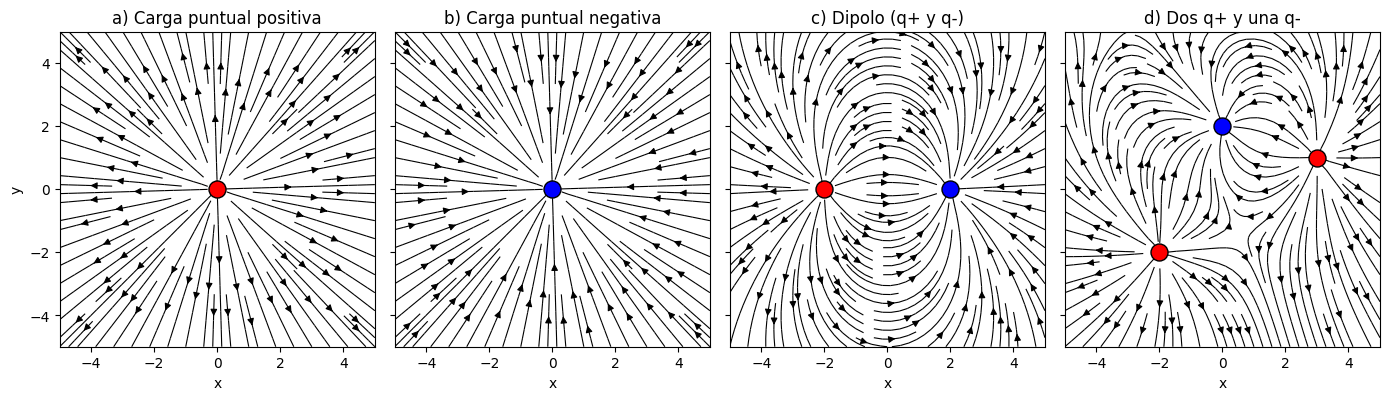

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb (valor relativo para visualización)
k = 1  

# Definición de función para calcular el campo eléctrico de varias cargas
def electric_field(X, Y, charges):
    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    for (x0, y0, q) in charges:
        dx = X - x0
        dy = Y - y0
        r2 = dx**2 + dy**2
        r3 = np.power(r2, 1.5)
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3
    return Ex, Ey

# Crear malla de puntos
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Configuraciones de los cuatro casos
cases = {
    "a) Carga puntual positiva": [(0, 0, 1)],
    "b) Carga puntual negativa": [(0, 0, -1)],
    "c) Dipolo (q+ y q-)": [(-2, 0, 1), (2, 0, -1)],
    "d) Dos q+ y una q-": [(-2, -2, 1), (3, 1, 2), (0, 2, -1)]
}

# Graficar
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True)
axes = axes.ravel()

for ax, (title, charges) in zip(axes, cases.items()):
    Ex, Ey = electric_field(X, Y, charges)
    ax.streamplot(X, Y, Ex, Ey, color="black", density=1.2, linewidth=0.8)
    for (x0, y0, q) in charges:
        color = 'r' if q > 0 else 'b'
        ax.scatter(x0, y0, c=color, s=150, edgecolors='k', zorder=2)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

axes[0].set_ylabel('y')

plt.tight_layout()
plt.show()



### **Distribución continua de cargas e integración**

Cuando la carga no está concentrada en puntos, sino distribuida sobre un objeto (barra, disco, anillo, etc.), hablamos de **carga continua**.  

En lugar de representar la carga como un conjunto de **puntos discretos**, podemos pensar en ella como una **densidad de carga** que se extiende sobre el objeto. Por ejemplo:

- **Carga lineal** `λ(x)` para barras o alambres: carga por unidad de longitud.  
- **Carga superficial** `σ(x,y)` para placas o anillos: carga por unidad de área.  
- **Carga volumétrica** `ρ(x,y,z)` para sólidos: carga por unidad de volumen.

El **campo eléctrico** en un punto debido a una distribución continua se calcula sumando (integrando) la contribución de cada elemento diferencial de carga `dq`:

$$ dq = \lambda \, d\ell \qquad dq = \sigma \, dA \qquad dq = \rho \, dV $$

y su forma integral es:

$$ \vec{E} = k_e \int \frac{dq}{r^2} \hat{r} $$


donde `r` es la distancia desde el elemento hasta el punto de evaluación, y `r̂` indica la dirección desde el elemento hasta el punto de evaluación.

Observe los siguientes ejemplos de campo eléctrico generado por distribuciones continuas de carga.

#### **Barra cargada uniformemente:**

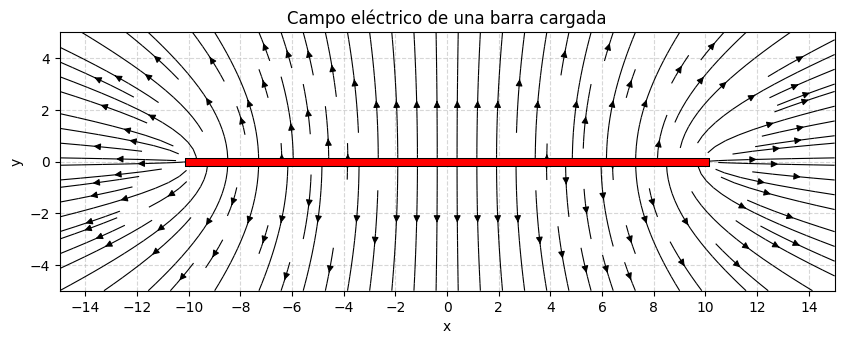

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field_rod(X, Y, x_start, x_end, y_pos, Q, n_points=200):
    """
    Calcula el campo eléctrico (Ex, Ey) generado por una barra cargada uniformemente.
    """
    # Discretizar la barra
    x_lin = np.linspace(x_start, x_end, n_points)
    dx = (x_end - x_start) / (n_points - 1)
    lambda_lin = Q / (x_end - x_start)  # densidad lineal de carga
    dq = lambda_lin * dx

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    
    for x0 in x_lin:
        dx_ = X - x0
        dy_ = Y - y_pos
        r2 = dx_**2 + dy_**2
        r2[r2 == 0] = 1e-20  # evitar división por cero
        r3 = r2**1.5
        Ex += dq * dx_ / r3
        Ey += dq * dy_ / r3

    k = 1  # constante relativa (ya que escalamos)
    Ex *= k
    Ey *= k
    return Ex, Ey

# --- Malla de simulación (20 x 10) ---
x = np.linspace(-15, 15, 100)  # ancho = 20
y = np.linspace(-5, 5, 50)     # alto = 10
X, Y = np.meshgrid(x, y)

# --- Calcular campo de una barra ---
Ex, Ey = electric_field_rod(X, Y, x_start=-10, x_end=10, y_pos=0, Q=2)

# --- Graficar ---
plt.figure(figsize=(10, 5))
plt.streamplot(X, Y, Ex, Ey, color="black", density=1.2, linewidth=0.8)
plt.plot([-10, 10], [0, 0], 'k', lw=6.5)  # dibujar la barra
plt.plot([-10, 10], [0, 0], 'r', lw=5)  # dibujar la barra
plt.xlim(-15, 15)
plt.ylim(-5, 5)
plt.xticks(np.arange(-14, 15, 2))
plt.yticks(np.arange(-4, 5, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal')  # mantiene la escala real
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico de una barra cargada')
plt.show()


#### **Barra cargada uniformemente más carga puntual**:

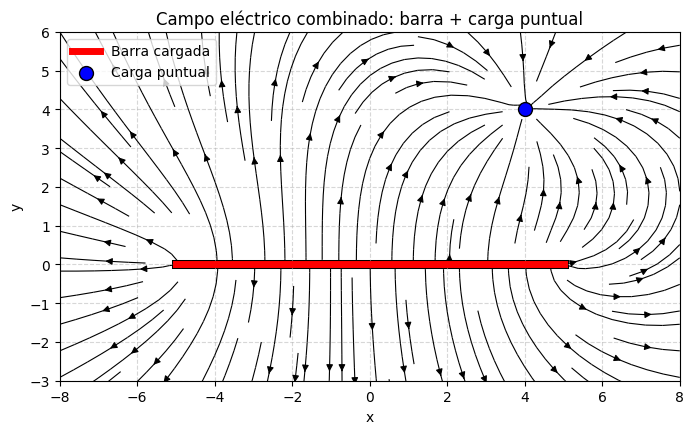

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb (valor relativo para visualización)
k = 1  

# --- Campo eléctrico de cargas puntuales ---
def electric_field_point(X, Y, charges):
    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    for (x0, y0, q) in charges:
        dx = X - x0
        dy = Y - y0
        r2 = dx**2 + dy**2
        r2[r2 == 0] = 1e-20  # evitar división por cero
        r3 = r2**1.5
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3
    return Ex, Ey

# --- Campo eléctrico de una barra cargada ---
def electric_field_rod(X, Y, x_start, x_end, y_pos, Q, n_points=200):
    x_lin = np.linspace(x_start, x_end, n_points)
    dx = (x_end - x_start) / (n_points - 1)
    lambda_lin = Q / (x_end - x_start)  # densidad lineal de carga
    dq = lambda_lin * dx

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    
    for x0 in x_lin:
        dx_ = X - x0
        dy_ = Y - y_pos
        r2 = dx_**2 + dy_**2
        r2[r2 == 0] = 1e-20
        r3 = r2**1.5
        Ex += dq * dx_ / r3
        Ey += dq * dy_ / r3

    return Ex, Ey

# --- Malla de simulación ---
x = np.linspace(-8, 8, 60)
y = np.linspace(-6, 6, 60)
X, Y = np.meshgrid(x, y)

# --- Definir sistema combinado ---
# Barra de -3 a 3 en x, ubicada en y=0, carga total Q=2
rod_params = (-5, 5, 0, 2)
# Carga puntual positiva en (2, 2)
point_charges = [(4, 4, -1)]

# --- Calcular campo total (superposición) ---
Ex_point, Ey_point = electric_field_point(X, Y, point_charges)
Ex_rod, Ey_rod = electric_field_rod(X, Y, *rod_params)
Ex_total = Ex_point + Ex_rod
Ey_total = Ey_point + Ey_rod

# --- Graficar ---
plt.figure(figsize=(8,8))
plt.streamplot(X, Y, Ex_total, Ey_total, color="black", density=1.2, linewidth=0.8)

# Dibujar la barra
x_start, x_end, y_pos, Q = rod_params
plt.plot([x_start, x_end], [y_pos, y_pos], 'r', lw=5, label="Barra cargada")

# Dibujar la carga puntual
for (x0, y0, q) in point_charges:
    color = 'r' if q > 0 else 'b'
    plt.scatter(x0, y0, c=color, s=100, edgecolors='k', label="Carga puntual", zorder=2)

plt.xlim(-8, 8)
plt.ylim(-3, 6)
plt.gca().set_aspect('equal')
plt.grid(ls="--", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico combinado: barra + carga puntual')
plt.legend(loc=2)
plt.plot([x_start, x_end], [y_pos, y_pos], 'k', lw=6.5, label="Barra cargada", zorder=1)
plt.show()


Ilustramos el principio de superposición:

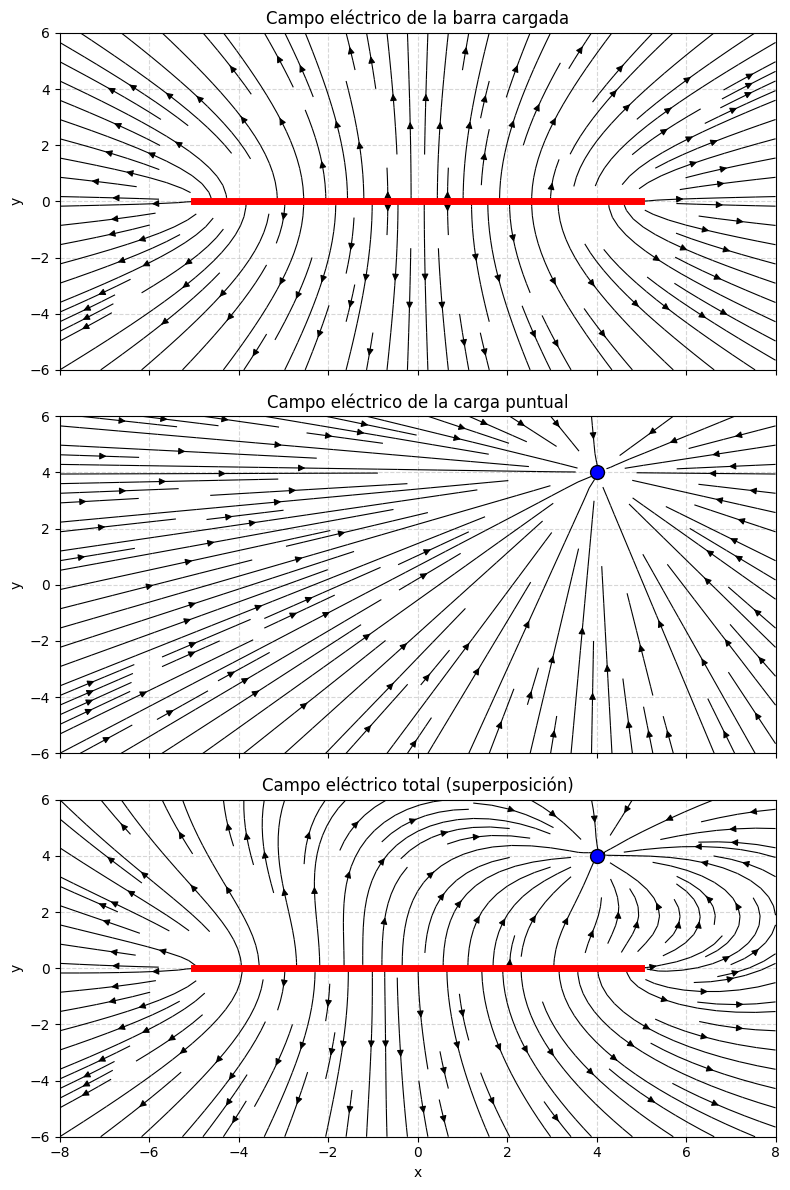

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb (valor relativo para visualización)
k = 1  

# --- Campo eléctrico de cargas puntuales ---
def electric_field_point(X, Y, charges):
    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    for (x0, y0, q) in charges:
        dx = X - x0
        dy = Y - y0
        r2 = dx**2 + dy**2
        r2[r2 == 0] = 1e-20
        r3 = r2**1.5
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3
    return Ex, Ey

# --- Campo eléctrico de una barra cargada ---
def electric_field_rod(X, Y, x_start, x_end, y_pos, Q, n_points=200):
    x_lin = np.linspace(x_start, x_end, n_points)
    dx = (x_end - x_start) / (n_points - 1)
    lambda_lin = Q / (x_end - x_start)
    dq = lambda_lin * dx

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    for x0 in x_lin:
        dx_ = X - x0
        dy_ = Y - y_pos
        r2 = dx_**2 + dy_**2
        r2[r2 == 0] = 1e-20
        r3 = r2**1.5
        Ex += dq * dx_ / r3
        Ey += dq * dy_ / r3

    return Ex, Ey

# --- Malla ---
x = np.linspace(-8, 8, 60)
y = np.linspace(-6, 6, 60)
X, Y = np.meshgrid(x, y)

# --- Parámetros del sistema ---
rod_params = (-5, 5, 0, 2)  # Barra de -5 a 5, en y=0, carga total Q=2
point_charges = [(4, 4, -1)]  # Carga puntual negativa

# --- Campos individuales ---
Ex_rod, Ey_rod = electric_field_rod(X, Y, *rod_params)
Ex_point, Ey_point = electric_field_point(X, Y, point_charges)

# --- Campo total (superposición) ---
Ex_total = Ex_rod + Ex_point
Ey_total = Ey_rod + Ey_point

# --- Graficar en subplots ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True, sharey=True)

# 1) Solo barra
axes[0].streamplot(X, Y, Ex_rod, Ey_rod, color="black", density=1.2, linewidth=0.8)
x_start, x_end, y_pos, Q = rod_params
axes[0].plot([x_start, x_end], [y_pos, y_pos], 'r', lw=5)
axes[0].set_title("Campo eléctrico de la barra cargada")
axes[0].set_ylabel("y")
axes[0].grid(ls="--", alpha=0.5)

# 2) Solo carga puntual
axes[1].streamplot(X, Y, Ex_point, Ey_point, color="black", density=1.2, linewidth=0.8)
for (x0, y0, q) in point_charges:
    color = 'r' if q > 0 else 'b'
    axes[1].scatter(x0, y0, c=color, s=100, edgecolors='k', zorder=2)
axes[1].set_title("Campo eléctrico de la carga puntual")
axes[1].set_ylabel("y")
axes[1].grid(ls="--", alpha=0.5)

# 3) Superposición
axes[2].streamplot(X, Y, Ex_total, Ey_total, color="black", density=1.2, linewidth=0.8)
axes[2].plot([x_start, x_end], [y_pos, y_pos], 'r', lw=5)
for (x0, y0, q) in point_charges:
    color = 'r' if q > 0 else 'b'
    axes[2].scatter(x0, y0, c=color, s=100, edgecolors='k', zorder=2)
axes[2].set_title("Campo eléctrico total (superposición)")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")
axes[2].grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.show()


#### **Anillo cargado uniformemente**:

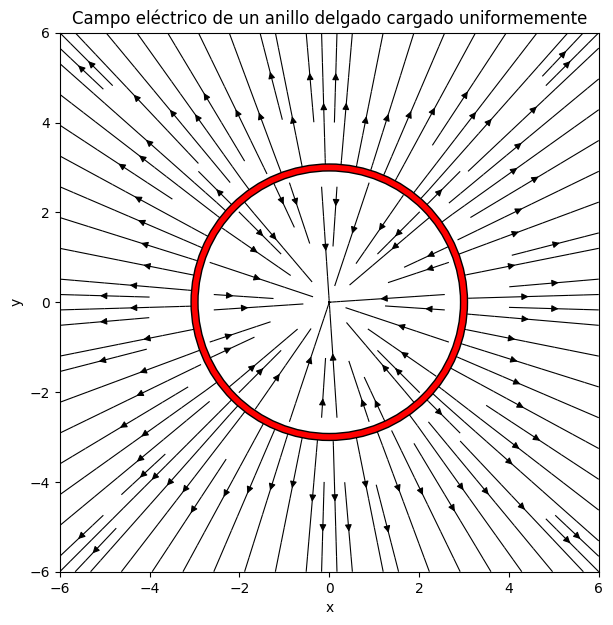

In [125]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Constante de Coulomb relativa para visualización

def electric_field_thin_ring(X, Y, center=(0.0,0.0), R=2.0, Q=1.0, n_points=200):
    """
    Calcula el campo eléctrico de un anillo delgado con carga uniforme.
    
    Parámetros
    ----------
    X, Y : 2D arrays (meshgrid) donde se evalúa el campo.
    center : (xc, yc) centro del anillo.
    R : radio del anillo.
    Q : carga total del anillo.
    n_points : número de puntos para discretizar el anillo.
    
    Retorna
    -------
    Ex, Ey : 2D arrays con las componentes del campo en cada punto.
    """
    xc, yc = center

    # Discretizar el ángulo
    theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
    x_ring = xc + R * np.cos(theta)
    y_ring = yc + R * np.sin(theta)
    dq = Q / n_points  # carga por cada segmento

    Ex = np.zeros_like(X, dtype=float)
    Ey = np.zeros_like(Y, dtype=float)

    # Sumar contribución de cada elemento de carga
    for xi, yi in zip(x_ring, y_ring):
        dx = X - xi
        dy = Y - yi
        r2 = dx**2 + dy**2
        r2 = np.maximum(r2, 1e-2)  # evitar división por cero
        r3 = r2 ** 1.5
        Ex += k * dq * dx / r3
        Ey += k * dq * dy / r3

    return Ex, Ey

# ===== Ejemplo de visualización =====
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X,Y = np.meshgrid(x,y)

# Parámetros del anillo delgado
R = 3.0
Q = 2.0

Ex, Ey = electric_field_thin_ring(X, Y, R=R, Q=Q, n_points=300)

plt.figure(figsize=(7,7))
plt.streamplot(X, Y, Ex, Ey, color="black", density=1.2, linewidth=0.8)
# Dibujar el anillo
circle = plt.Circle((0,0), R, fill=False, color='r', lw=4, zorder=2)
circle_border = plt.Circle((0,0), R, fill=False, color='k', lw=6, zorder=1)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle_border)

plt.gca().set_aspect('equal')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico de un anillo delgado cargado uniformemente')
plt.show()


#### **Semicírculo cargado uniformemente:**

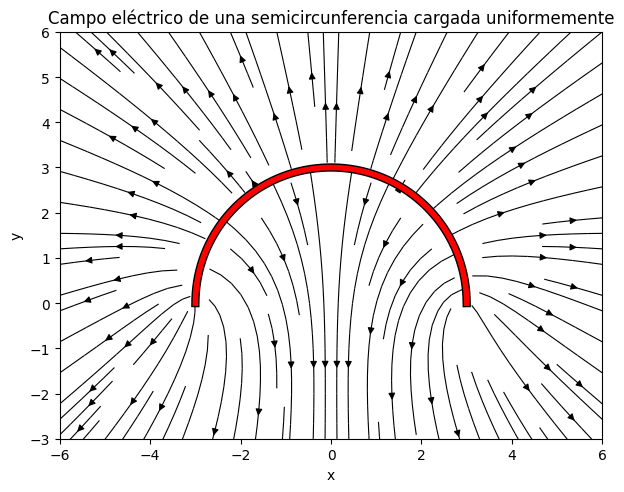

In [126]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Constante de Coulomb relativa para visualización

def electric_field_semicircle(X, Y, center=(0.0,0.0), R=2.0, Q=1.0, n_points=200, orientation='top'):
    """
    Calcula el campo eléctrico de una semicircunferencia cargada uniformemente.
    
    Parámetros
    ----------
    X, Y : 2D arrays (meshgrid) donde se evalúa el campo.
    center : (xc, yc) centro de la semicircunferencia.
    R : radio de la semicircunferencia.
    Q : carga total de la semicircunferencia.
    n_points : número de puntos para discretizar la semicircunferencia.
    orientation : 'top' para semicircunferencia superior, 'bottom' para inferior
    
    Retorna
    -------
    Ex, Ey : 2D arrays con las componentes del campo en cada punto.
    """
    xc, yc = center

    # Elegir el rango de ángulos según orientación
    if orientation == 'top':
        theta = np.linspace(0, np.pi, n_points)
    elif orientation == 'bottom':
        theta = np.linspace(np.pi, 2*np.pi, n_points)
    else:
        raise ValueError("orientation debe ser 'top' o 'bottom'")

    x_semi = xc + R * np.cos(theta)
    y_semi = yc + R * np.sin(theta)
    dq = Q / n_points  # carga por cada segmento

    Ex = np.zeros_like(X, dtype=float)
    Ey = np.zeros_like(Y, dtype=float)

    # Sumar contribución de cada elemento de carga
    for xi, yi in zip(x_semi, y_semi):
        dx = X - xi
        dy = Y - yi
        r2 = dx**2 + dy**2
        r2 = np.maximum(r2, 1e-2)  # evitar división por cero
        r3 = r2 ** 1.5
        Ex += k * dq * dx / r3
        Ey += k * dq * dy / r3

    return Ex, Ey

# ===== Ejemplo de visualización =====
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X,Y = np.meshgrid(x,y)

# Parámetros de la semicircunferencia
R = 3.0
Q = 2.0

Ex, Ey = electric_field_semicircle(X, Y, R=R, Q=Q, n_points=300, orientation='top')

plt.figure(figsize=(7,7))
plt.streamplot(X, Y, Ex, Ey, color="black", density=1.2, linewidth=0.8)
# Dibujar la semicircunferencia
theta = np.linspace(0, np.pi, 300)
x_semi = R * np.cos(theta)
y_semi = R * np.sin(theta)
plt.plot(x_semi, y_semi, 'r', lw=4, zorder=2)
plt.plot(x_semi, y_semi, 'k', lw=6, zorder=1)


plt.gca().set_aspect('equal')
plt.xlim(-6,6)
plt.ylim(-3,6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico de una semicircunferencia cargada uniformemente')
plt.show()


#### **Semicírculo + carga puntual**:

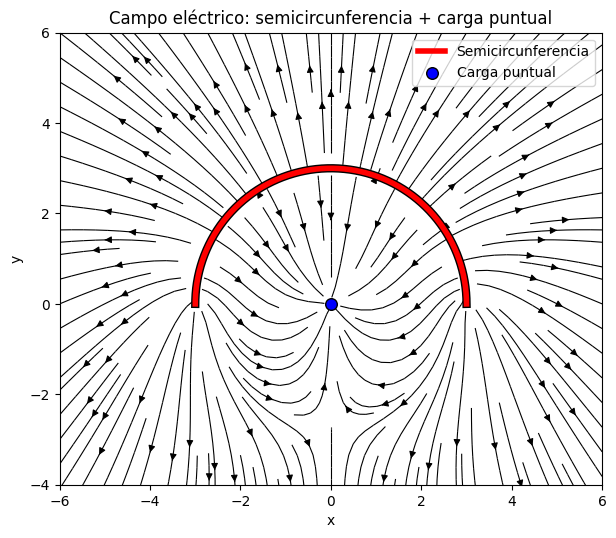

In [127]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Constante de Coulomb relativa para visualización

# --- Campo eléctrico de una carga puntual ---
def electric_field_point(X, Y, charges):
    Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
    for (x0, y0, q) in charges:
        dx = X - x0
        dy = Y - y0
        r2 = dx**2 + dy**2
        r2 = np.maximum(r2, 1e-2)  # evitar división por cero
        r3 = r2 ** 1.5
        Ex += k * q * dx / r3
        Ey += k * q * dy / r3
    return Ex, Ey

# --- Campo eléctrico de una semicircunferencia ---
def electric_field_semicircle(X, Y, center=(0.0,0.0), R=2.0, Q=1.0, n_points=200, orientation='top'):
    xc, yc = center
    if orientation == 'top':
        theta = np.linspace(0, np.pi, n_points)
    elif orientation == 'bottom':
        theta = np.linspace(np.pi, 2*np.pi, n_points)
    else:
        raise ValueError("orientation debe ser 'top' o 'bottom'")

    x_semi = xc + R * np.cos(theta)
    y_semi = yc + R * np.sin(theta)
    dq = Q / n_points

    Ex, Ey = np.zeros_like(X), np.zeros_like(Y)

    for xi, yi in zip(x_semi, y_semi):
        dx = X - xi
        dy = Y - yi
        r2 = dx**2 + dy**2
        r2 = np.maximum(r2, 1e-2)
        r3 = r2 ** 1.5
        Ex += k * dq * dx / r3
        Ey += k * dq * dy / r3

    return Ex, Ey

# ===== Malla de evaluación =====
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X,Y = np.meshgrid(x,y)

# ===== Configuración de cargas =====
# Semicircunferencia superior
Ex_semi, Ey_semi = electric_field_semicircle(X, Y, R=3.0, Q=4.0, n_points=300, orientation='top')

# Carga puntual negativa
point_charges = [(0, 0, -1)]
Ex_point, Ey_point = electric_field_point(X, Y, point_charges)

# ===== Campo total (superposición) =====
Ex_total = Ex_semi + Ex_point
Ey_total = Ey_semi + Ey_point

# ===== Graficar =====
plt.figure(figsize=(7,7))
plt.streamplot(X, Y, Ex_total, Ey_total, color="black", density=1.5, linewidth=0.8)

# Dibujar semicircunferencia
theta = np.linspace(0, np.pi, 300)
x_semi = 3.0 * np.cos(theta)
y_semi = 3.0 * np.sin(theta)
plt.plot(x_semi, y_semi, 'r', lw=4, zorder=2, label='Semicircunferencia')
plt.plot(x_semi, y_semi, 'k', lw=6, zorder=1)

# Dibujar carga puntual
for (x0, y0, q) in point_charges:
    color = 'r' if q > 0 else 'b'
    plt.scatter(x0, y0, c=color, s=70, edgecolors='k', label='Carga puntual', zorder=2)

plt.gca().set_aspect('equal')
plt.xlim(-6,6)
plt.ylim(-4,6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo eléctrico: semicircunferencia + carga puntual')
plt.legend()
plt.show()


#### **Barra con densidad de carga no uniforme**

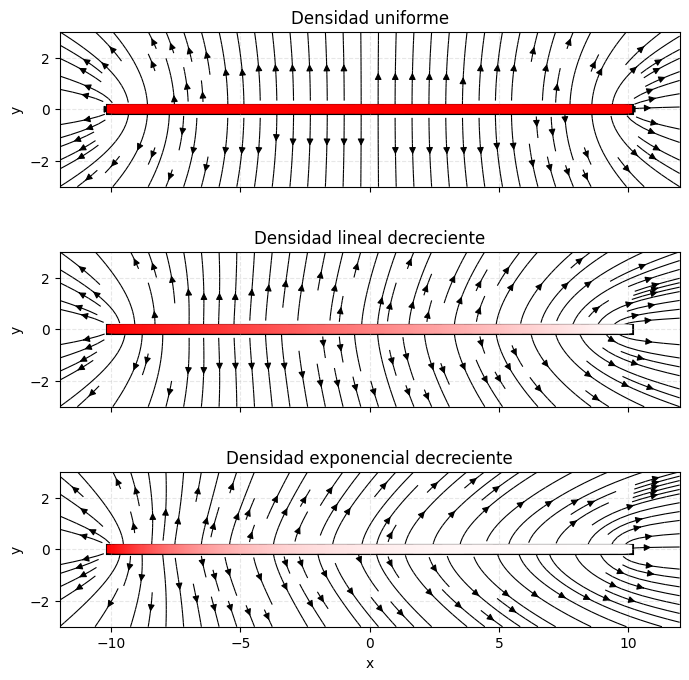

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def electric_field_rod_custom(X, Y, x_start, x_end, y_pos, Q_total, n_points=500, density_type='uniform', decay=3.0):
    x_lin = np.linspace(x_start, x_end, n_points)
    dx = (x_end - x_start)/(n_points - 1)
    
    if density_type == 'uniform':
        lambda_raw = np.ones_like(x_lin)
    elif density_type == 'linear':
        lambda_raw = 1 - (x_lin - x_start)/(x_end - x_start)
    elif density_type == 'exp':
        lambda_raw = np.exp(-decay * (x_lin - x_start)/(x_end - x_start))
    else:
        raise ValueError("density_type debe ser 'uniform', 'linear' o 'exp'")
    
    lambda_lin = lambda_raw / np.sum(lambda_raw*dx) * Q_total

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    for xi, lam in zip(x_lin, lambda_lin):
        dx_ = X - xi
        dy_ = Y - y_pos
        r2 = np.maximum(dx_**2 + dy_**2, 1e-20)
        r3 = r2 ** 1.5
        dq = lam * dx
        Ex += dq * dx_ / r3
        Ey += dq * dy_ / r3

    return Ex, Ey, x_lin, lambda_lin

# --- Malla ---
x = np.linspace(-12, 12, 150)
y = np.linspace(-3, 3, 75)
X, Y = np.meshgrid(x, y)

density_types = ['uniform', 'linear', 'exp']
titles = ['Densidad uniforme', 'Densidad lineal decreciente', 'Densidad exponencial decreciente']

# Colormap rojo a blanco
red_white_cmap = LinearSegmentedColormap.from_list('RedWhite', ['white', 'red'])

fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

for ax, density_type, title in zip(axes, density_types, titles):
    Ex, Ey, x_lin, lambda_lin = electric_field_rod_custom(
        X, Y, x_start=-10, x_end=10, y_pos=0, Q_total=2, n_points=500,
        density_type=density_type, decay=5.0
    )
    ax.streamplot(X, Y, Ex, Ey, color="black", density=1.2, linewidth=0.8)
    
    # Normalizar densidad con vmin=0 para que la barra siempre se vea roja
    norm = plt.Normalize(vmin=0, vmax=lambda_lin.max())
    for i in range(len(x_lin)-1):
        ax.plot([x_lin[i], x_lin[i+1]], [0,0], color=red_white_cmap(norm(lambda_lin[i])), lw=6)
    
    ax.plot([x_lin[0], x_lin[-1]], [0,0], color="k", lw=8, zorder=1)
    
    ax.set_xlim(-12,12)
    ax.set_ylim(-2,2)
    ax.axis('scaled')
    ax.set_title(title)
    ax.set_ylabel('y')
    ax.grid(True, linestyle='--', alpha=0.3)

axes[-1].set_xlabel('x')
plt.subplots_adjust(hspace=0.25)
plt.show()


### **Partícula moviéndose en un campo eléctrico**



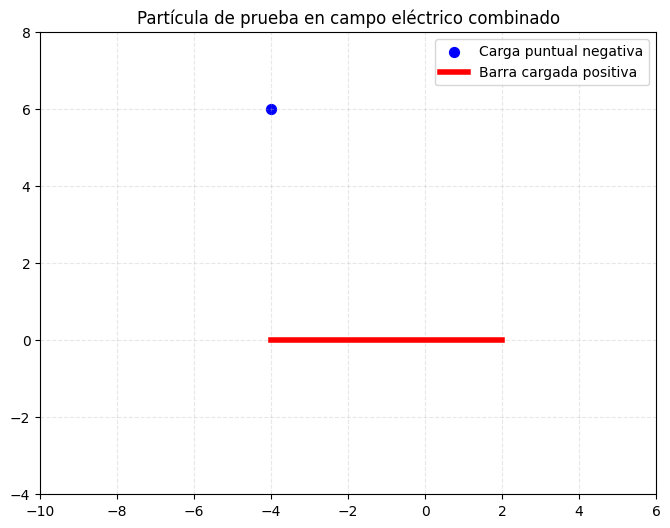

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# === Parámetros físicos ===
k = 9e9
q_test = 1e-6  # Carga de prueba (positiva)
m = 1e-3
dt = 0.002
steps = 900

# === Distribuciones de carga ===
q_p = -20e-5
pos_p = np.array([-4.0, 6.0])

lambda_bar = 3e-5
x_bar = np.linspace(-4, 2, 80)
y_bar = np.zeros_like(x_bar)
dx_bar = x_bar[1] - x_bar[0]
dq = lambda_bar * dx_bar

# === Inicialización partícula de prueba ===
pos = np.array([4.0, 2.0])
vel = np.array([-28.8, 0.0])

# === Campo eléctrico ===
def electric_field(x, y):
    r = np.array([x, y])
    E = np.zeros(2)
    
    # Carga puntual (negativa)
    r_p = r - pos_p
    dist_p = np.linalg.norm(r_p)
    if dist_p > 1e-8:
        E += k * q_p * r_p / dist_p**3
    
    # Barra cargada (positiva)
    r_b = np.stack([r[0] - x_bar, r[1] - y_bar], axis=1)
    dist_b = np.linalg.norm(r_b, axis=1)
    mask = dist_b > 1e-8
    E += np.sum(k * dq * r_b[mask] / dist_b[mask][:, None]**3, axis=0)
    
    return E

# === Trayectoria ===
positions = [pos.copy()]
for _ in range(steps):
    E = electric_field(*pos)
    acc = (q_test * E) / m
    vel += acc * dt
    pos += vel * dt
    positions.append(pos.copy())

positions = np.array(positions)

# === Animación ===
fig, ax = plt.subplots(figsize=(8, 6))  # Figura rectangular para ver más área
ax.set_xlim(-10, 6)
ax.set_ylim(-4, 8)
ax.set_aspect('equal', adjustable='box')  # Escala correcta pero ajustando el lienzo
ax.set_title("Partícula de prueba en campo eléctrico combinado")

# Dibujar distribuciones
ax.scatter(*pos_p, color='blue', s=50, label='Carga puntual negativa')
ax.plot(x_bar, y_bar, color='red', lw=4, label='Barra cargada positiva')

# Partícula
particle, = ax.plot([], [], 'o', color='black', markersize=5)
trail, = ax.plot([], [], color='gray', alpha=0.7, lw=2)

def init():
    particle.set_data([], [])
    trail.set_data([], [])
    return particle, trail

def update(frame):
    particle.set_data(positions[frame, 0], positions[frame, 1])
    trail.set_data(positions[:frame, 0], positions[:frame, 1])
    return particle, trail

ani = FuncAnimation(fig, update, frames=len(positions), init_func=init,
                    blit=True, interval=20, repeat=False)

plt.legend()
plt.grid(ls='--', alpha=0.3)
plt.show()


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Teórica y Física Computacional<br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>